In [2]:
import yfinance as yf
import pandas as pd
import finance_calculator as fc
import numpy as np
import pyfolio as pf
import empyrical as em

In [3]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
dows30 = yf.Ticker("^DJI")
nasdaq = yf.Ticker("^IXIC")
sptsx = yf.Ticker("^GSPTSE")
sp500_data = sp500.history(start= start, actions=False)
dows30_data = dows30.history(start = start)
nasdaq_data = nasdaq.history(start= start)
sptsx_data = sptsx.history(start= start)

In [5]:
#pull list of companies listed on S&P 500 select 10 random stocks to create custom portfolio

data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'
package = dp.Package(data_url)
resources= package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

df = data

NameError: name 'package' is not defined

In [8]:
#payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks')
#first_table = payload[0]
#second_table = payload[1]
df

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


In [6]:
#generate 10 random integers from 0 - 499 to serve as our randomly created portfolio

index_numbers = np.random.randint(low=0, high=499, size=10)
print(index_numbers)

[245 406 383 458 310 402 416 481 224 321]


In [7]:
#isloate ticker symbols using loc function
random_portfolio = df.loc[index_numbers]
random_portfolio.head(10)

,Symbol,Name,Sector
245,ILMN,Illumina,Health Care
406,SBAC,SBA Communications,Real Estate
383,PHM,PulteGroup,Consumer Discretionary
458,UAA,Under Armour (Class A),Consumer Discretionary
310,MTD,Mettler Toledo,Health Care
402,ROST,Ross Stores,Consumer Discretionary
416,SO,Southern Company,Utilities
481,WBA,Walgreens Boots Alliance,Consumer Staples
224,HCA,HCA Healthcare,Health Care
321,MNST,Monster Beverage,Consumer Staples


In [16]:
#random_stock_1 = yf.Ticker("EOG")
symbol_df = random_portfolio["Symbol"].reset_index()
symbol_df.head(10)


,index,Symbol
0,256,IPGP
1,494,WMB
2,100,CERN
3,232,HON
4,285,LNC
5,197,FISV
6,422,SYK
7,27,AMCR
8,368,PSX
9,93,CBOE


In [17]:
# pull data for 10 randomly genereated stocks 
random_stock_0 = yf.Ticker(symbol_df["Symbol"][0])
random_stock_1 = yf.Ticker(symbol_df["Symbol"][1])
random_stock_2 = yf.Ticker(symbol_df["Symbol"][2])
random_stock_3 = yf.Ticker(symbol_df["Symbol"][3])
random_stock_4 = yf.Ticker(symbol_df["Symbol"][4])
random_stock_5 = yf.Ticker(symbol_df["Symbol"][5])
random_stock_6 = yf.Ticker(symbol_df["Symbol"][6])
random_stock_7 = yf.Ticker(symbol_df["Symbol"][7])
random_stock_8 = yf.Ticker(symbol_df["Symbol"][8])
random_stock_9 = yf.Ticker(symbol_df["Symbol"][9])

random_stock_0_data = random_stock_0.history(start = start, actions =False)
random_stock_1_data = random_stock_1.history(start = start, actions =False)
random_stock_2_data = random_stock_2.history(start = start, actions =False)
random_stock_3_data = random_stock_3.history(start = start, actions =False)
random_stock_4_data = random_stock_4.history(start = start, actions =False)
random_stock_5_data = random_stock_5.history(start = start, actions =False)
random_stock_6_data = random_stock_6.history(start = start, actions =False)
random_stock_7_data = random_stock_7.history(start = start, actions =False)
random_stock_8_data = random_stock_8.history(start = start, actions =False)
random_stock_9_data = random_stock_9.history(start = start, actions =False)

random_stock_0_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_1_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_2_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_3_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_4_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_5_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_6_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_7_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_8_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_9_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)


In [22]:
# combine daily close into single df

random_portfolio = pd.concat([random_stock_0_data, 
           random_stock_1_data, 
           random_stock_2_data, 
           random_stock_3_data, 
           random_stock_4_data, 
           random_stock_5_data, 
           random_stock_6_data, 
           random_stock_7_data, 
           random_stock_8_data, 
           random_stock_9_data], 
           axis="columns", join="inner").reset_index() 
random_portfolio.head()

,Date,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
0,2018-01-02,222.339996,24.451794,66.720215,136.515121,69.932907,65.175003,151.423828,9.960690,87.430824,121.389290
1,2018-01-17,260.950012,25.535397,68.384079,140.689362,74.796478,69.125000,153.696625,9.791867,91.220207,130.062073
2,2018-01-18,260.750000,25.346945,67.615379,140.129852,74.868584,68.970001,153.706223,9.791867,90.472641,131.436661
3,2018-01-23,263.339996,26.030087,67.323486,141.737366,74.724358,70.195000,155.298157,9.783426,91.856064,133.315613
4,2018-01-24,255.729996,25.990826,65.873680,142.074844,75.120964,70.070000,157.743530,9.918484,89.905525,134.067200


In [25]:
random_portfolio["Date"][0]

Timestamp('2018-01-02 00:00:00')

In [ ]:
#calc daily_returns for random portfolio
random_portfolio_daily_returns = random_portfolio.pct_change().dropna()
random_portfolio_daily_returns.head()

In [ ]:
# calculate daily returns of portfolio assuming equal with (0.1) into each stock
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

random_portfolio_returns = random_portfolio_daily_returns.dot(weights)


In [ ]:
#column_name = "Random Portfolio"
#random_portfolio_returns.columns = column_name
random_portfolio_returns.rename({'0':'Random Portfolio'}, axis='columns')
random_portfolio_returns

In [56]:
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
sp500_data

KeyError: "['Open' 'High' 'Low' 'Volume'] not found in axis"

In [64]:
sp500_data.loc["2020-03-23"]

Close    2237.399902
Name: 2020-03-23 00:00:00, dtype: float64

In [61]:
sp500_data.idxmin()

Close   2020-03-23
dtype: datetime64[ns]

In [23]:
# Fidelity funds Information and historical closing price since January 2018
fid_us_stocks = yf.Ticker("0P0001364K.TO")
fid_us_stocks_data = fid_us_stocks.history(start = start, actions=False)
fid_us_equity = yf.Ticker("0P000074PP.TO")
fid_us_equity_data = fid_us_equity.history(start = start, actions=False)
# NEI funds ...
nei_us_equity_rs = yf.Ticker("0P000070LH.TO")
nei_us_equity_rs_data = nei_us_equity_rs.history(start = start, actions=False)
# Invesco funds ...
aim_us_companies = yf.Ticker("0P000072U5.TO")
aim_us_companies_data = aim_us_companies.history(start = start, actions=False)
#CIBC funds ...
cibc_us_equity = yf.Ticker("0P000077O0.TO")
cibc_us_equity_data = cibc_us_equity.history(start = start, actions=False)
#RBC funds ...
rbc_us_equity = yf.Ticker("RBCUSEQUITYS.TO")
rbc_us_equity_data = rbc_us_equity.history(start = start, actions=False)
#Scotia funds ...
scotia_us_equity = yf.Ticker("0P000070D4.TO")
scotia_us_equity_data = scotia_us_equity.history(start = start, actions=False)
#BMO funds ...
bmo_us_equity = yf.Ticker("0P00014EDS.TO")
bmo_us_equity_data = bmo_us_equity.history(start = start, actions=False)
#Sunlife Funds
sunlife_us_growth = yf.Ticker("0P00015ILM.TO")
sunlife_us_growth_data = sunlife_us_growth.history(start = start, actions=False)
#Mawer Funds
mawer_us_equity = yf.Ticker("0P0000716B.TO")
mawer_us_equity_data = mawer_us_equity.history(start = start, actions=False)

In [24]:
# Drop extra columns - Open, High, Low, Volume

fid_us_stocks_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
fid_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
nei_us_equity_rs_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
aim_us_companies_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
cibc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
rbc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
scotia_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bmo_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
sunlife_us_growth_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
mawer_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)




In [25]:
mawer_us_equity_data.count()

Close    938
dtype: int64

In [26]:
# Combine into single df using concat function -excluding RBC for now - only 16 data points
daily_close_df = pd.concat([fid_us_stocks_data, fid_us_equity_data, nei_us_equity_rs_data, aim_us_companies_data, cibc_us_equity_data, scotia_us_equity_data, bmo_us_equity_data, sunlife_us_growth_data, mawer_us_equity_data, sp500_data], axis="columns", join="inner")

In [27]:
columns = ["FID US Stocks", "FID US Equity", "NEI US Equity RS", "AIM US Companies", "CIBC US Equity", "Scotia US Equity", "BMO US Equity", "Sunlife US Growth", "Mawer US Equity", "S&P500"]
daily_close_df.columns=(columns)


In [28]:
daily_returns = daily_close_df.pct_change()

In [34]:
# combine daily return of random portfolio with mutual fund and SP500 returns.
combined_with_random = pd.concat([random_portfolio_returns, daily_returns], axis="columns", join="inner" )
columns_with_random = ["Random Portfolio","FID US Stocks", "FID US Equity", "NEI US Equity RS", "AIM US Companies", "CIBC US Equity", "Scotia US Equity", "BMO US Equity", "Sunlife US Growth", "Mawer US Equity", "S&P500"]
combined_with_random.columns=(columns_with_random)
combined_with_random

,Random Portfolio,FID US Stocks,FID US Equity,NEI US Equity RS,AIM US Companies,CIBC US Equity,Scotia US Equity,BMO US Equity,Sunlife US Growth,Mawer US Equity,S&P500
Date,,,,,,,,,,,
2018-01-03,0.007897,0.011615,0.007338,0.007122,0.010438,0.010296,0.008984,0.008046,0.013065,0.009637,0.006399
2018-01-04,0.009331,0.007428,0.001941,0.002840,0.001109,-0.000562,0.001228,0.003287,0.002525,0.005464,0.004029
2018-01-05,0.006992,0.015560,-0.000520,0.001880,-0.001247,0.003267,-0.000176,-0.000596,-0.000058,-0.002476,0.007034
2018-01-08,0.005077,0.003022,0.005053,0.001745,0.001387,0.002338,0.002937,-0.000112,0.005075,0.004642,0.001662
2018-01-09,0.002363,0.002904,0.004560,0.003358,0.010317,0.007281,0.004431,0.004599,0.006273,0.007178,0.001303
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21,-0.002324,0.001453,0.000760,0.000846,0.002191,-0.000649,-0.000389,0.000470,0.002817,0.000679,-0.000812
2021-09-22,0.013043,0.013356,0.004097,0.002390,0.008696,0.004507,0.005132,0.007602,0.001914,0.002699,0.009520
2021-09-23,0.022501,0.014158,-0.002485,0.000838,0.005371,0.005334,0.003554,0.004545,0.003210,0.003395,0.012135


<AxesSubplot:xlabel='Date'>

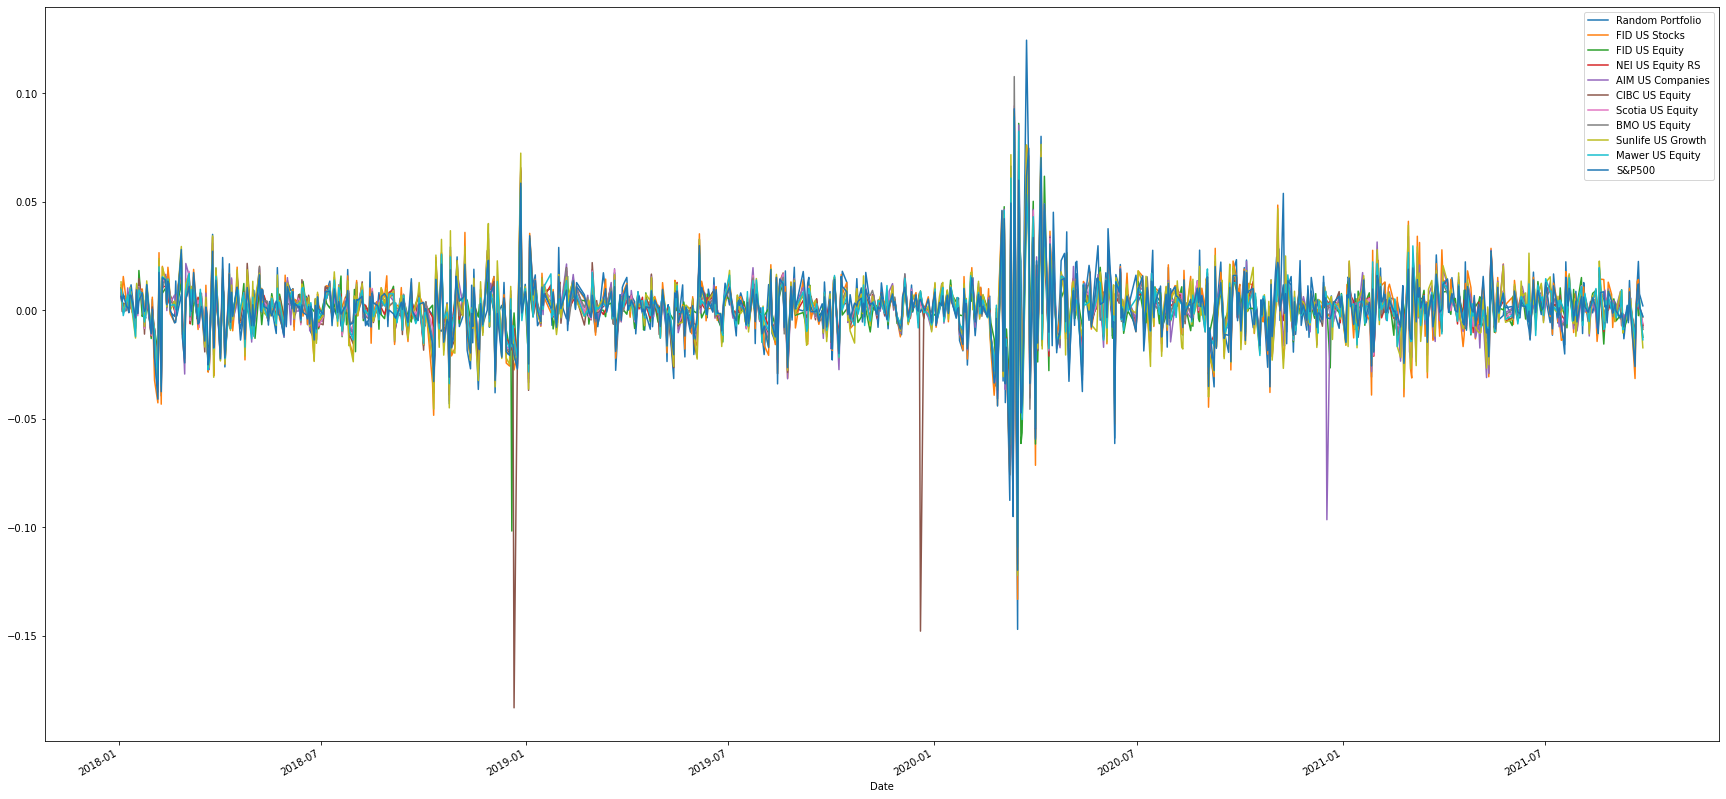

In [35]:
combined_with_random.plot(figsize=(30,15))


In [36]:
growth_10k = (1 + combined_with_random) * 10000


<AxesSubplot:xlabel='Date'>

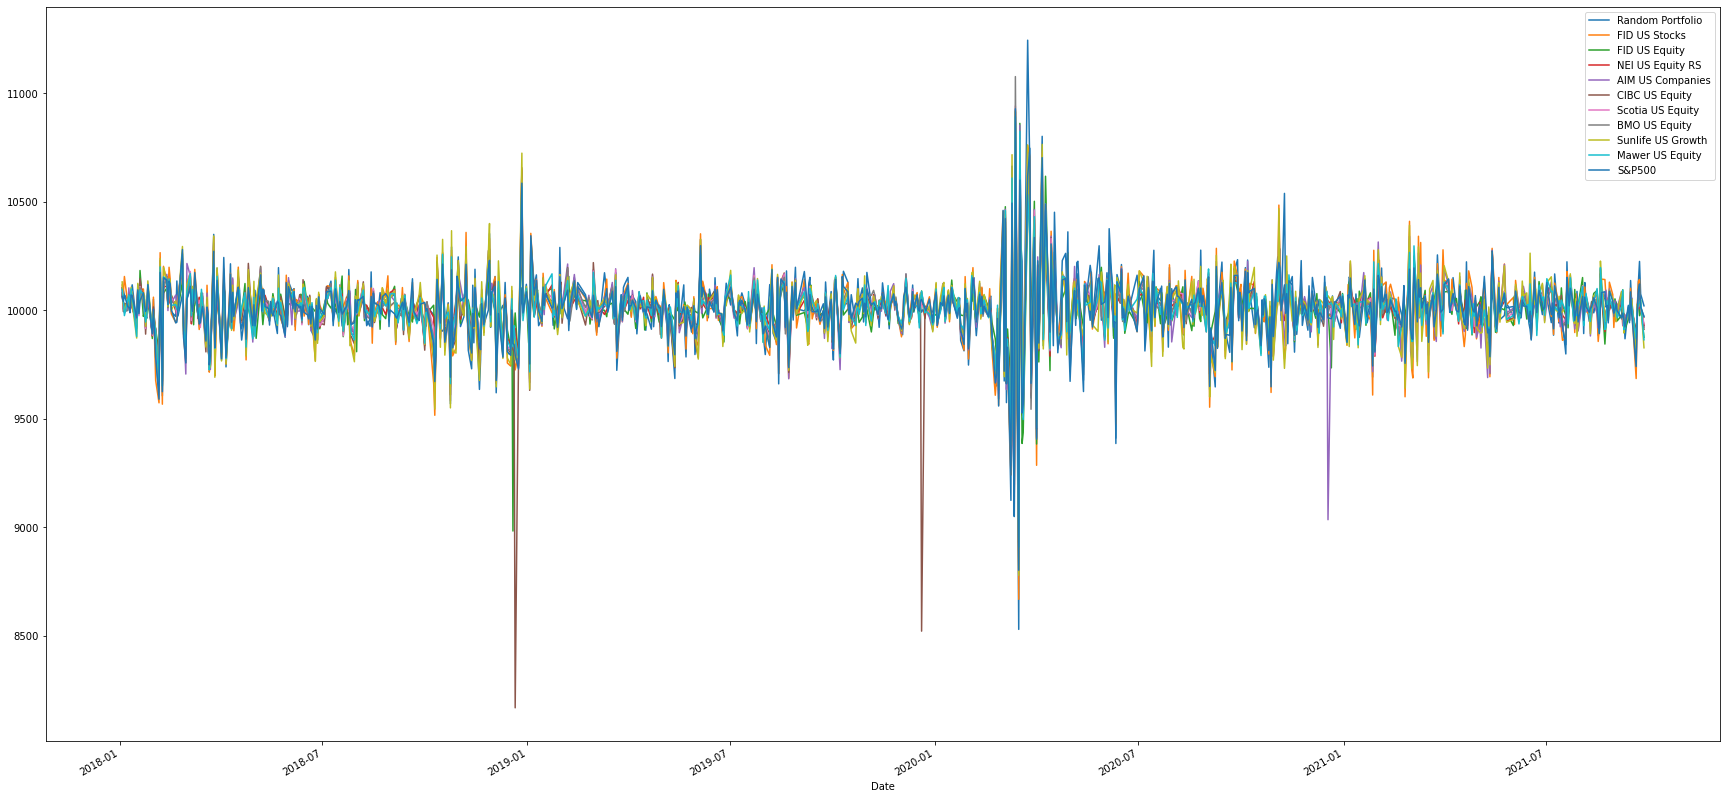

In [37]:
growth_10k.plot(figsize=(30,15))

<AxesSubplot:xlabel='Date'>

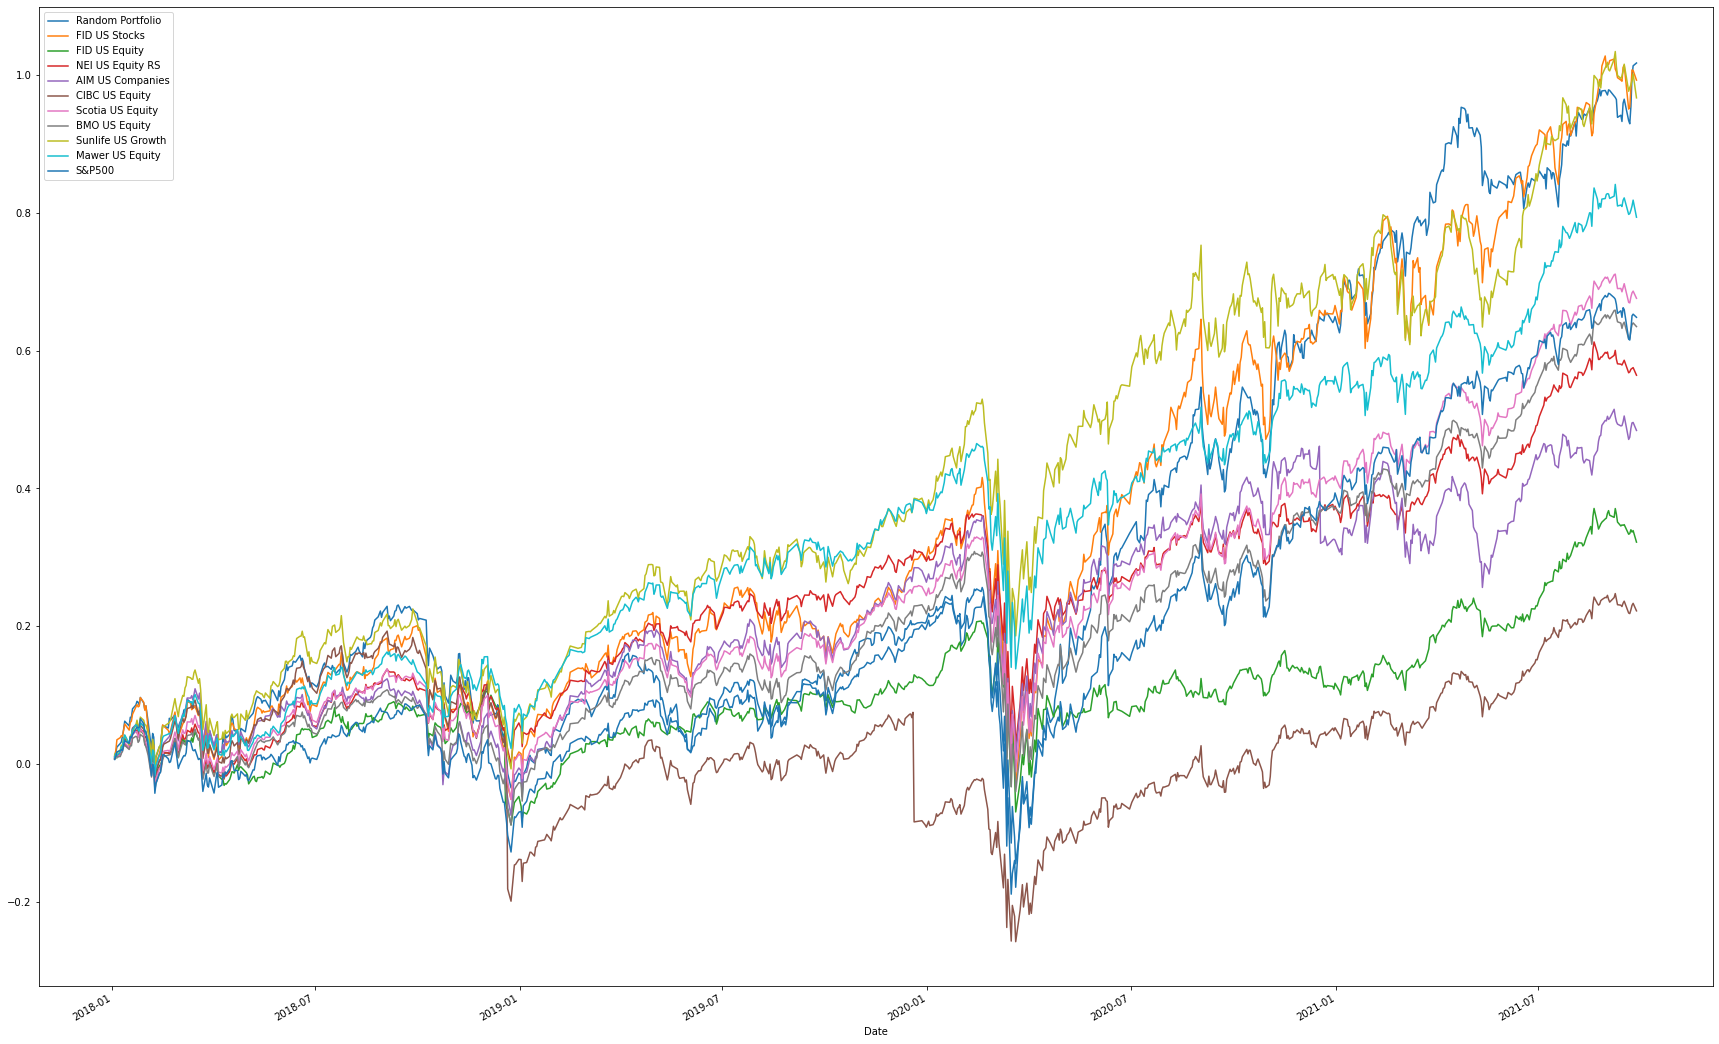

In [53]:
cumulative_return = (1+ combined_with_random).cumprod()-1
cumulative_return.plot(figsize=(30,20))

<AxesSubplot:xlabel='Date'>

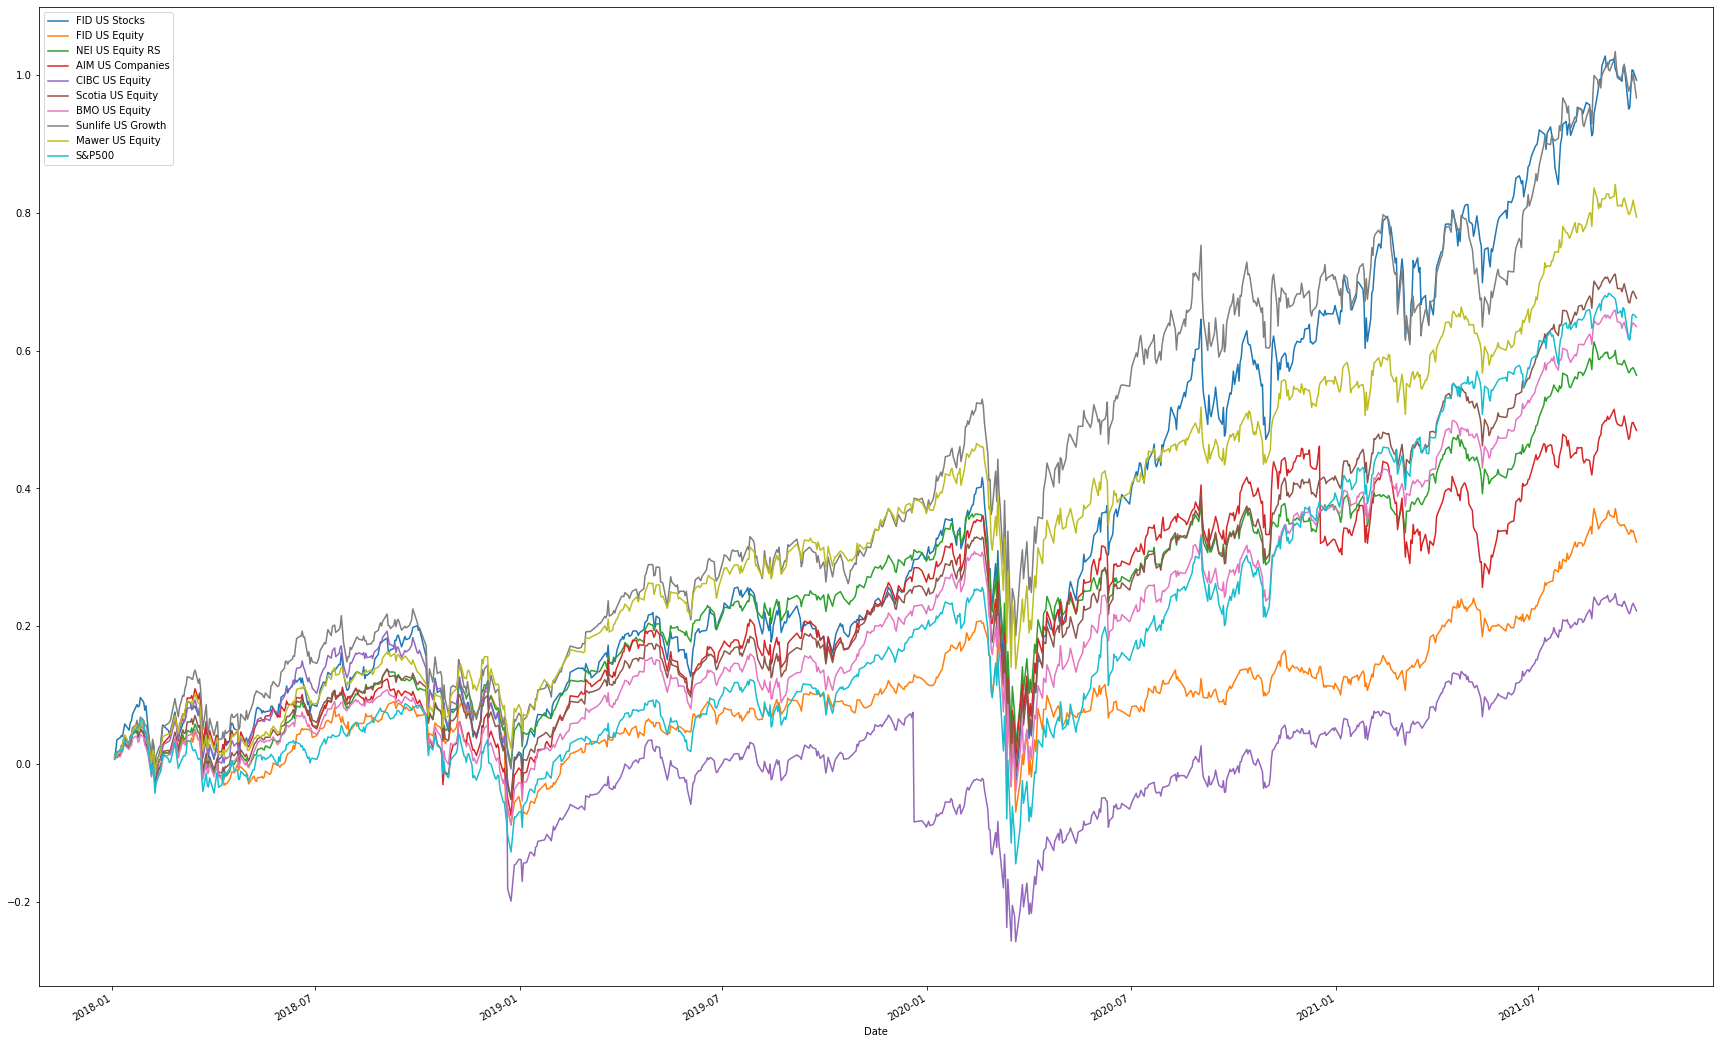

In [54]:
cumulative_return_2 = (1+ daily_returns).cumprod()-1
cumulative_return_2.plot(figsize=(30,20))

In [23]:
daily_close_df.dtypes

FID US Stocks        float64
FID US Equity        float64
NEI US Equity RS     float64
AIM US Companies     float64
CIBC US Equity       float64
Scotia US Equity     float64
BMO US Equity        float64
Sunlife US Growth    float64
Mawer US Equity      float64
S&P500               float64
dtype: object

In [24]:
upside = fc.get_upside_capture(fid_us_stocks_data, sp500_data)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
#isolate data for Covid dip Feb 19th 2020 - March 23rd 2020


#isolate data for covid recovery March 23rd - August 18th



True

In [ ]:
all(sp500_data)

In [ ]:
annualized_returns = em.annual_return(daily_returns, period="daily")
annualized_returns

In [ ]:
fid_us_stocks_data.tail()